In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

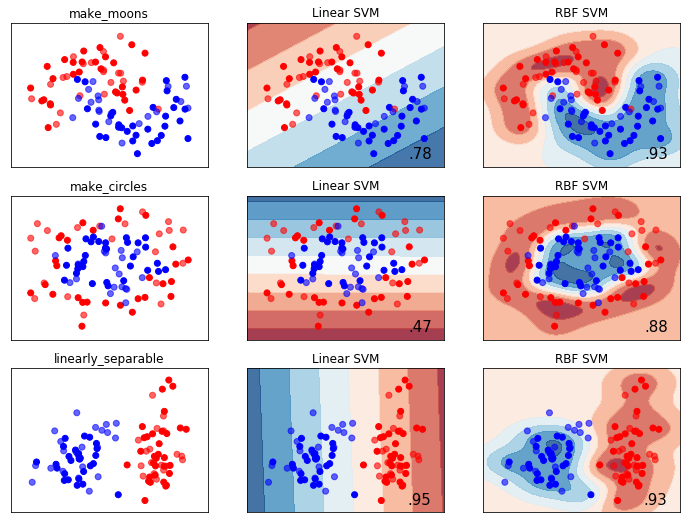

In [2]:
#clasificadores SVM
names = ["Linear SVM", "RBF SVM"]
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)]

X, y = make_classification(n_features=2, n_redundant=0,random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += rng.uniform(size=X.shape)
linearly_separable = (X, y)

#crear datasets
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(12, 9))
i = 1
h = .02

#iterar sobre cada dataset
for ds in datasets:
    # cdada dataset lo dividimos en parte entrenamiento y parte de test
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # primero pintamos el dataset
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # pintar los puntos de entrenamiento
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=cm_bright)
    
    # y los puntos de test
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i)
    if i==1:
        ax.set_title("make_moons")
    if i==4:
        ax.set_title("make_circles")
    if i==7:
        ax.set_title("linearly_separable")    
    
    i += 1

    # por cada uno de los clasificadores
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Trazar la linea de decisión. Asignaremos un color a
        # Cada punto en la malla [x_min, m_max] x [y_min, y_max]
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

        # Coloque el resultado en una trama de color
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Pintar los puntos de entrenamiento
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=cm_bright)
        # y los puntos de test
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,cmap=cm_bright, alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, 
          ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
        i += 1

plt.show()